In [51]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [53]:


from pandas import read_csv, unique

import numpy as np
import pandas as pd

from scipy.interpolate import interp1d
from scipy.stats import mode

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from tensorflow import stack
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense
from keras.layers import Dense, GlobalAveragePooling1D, BatchNormalization, MaxPool1D, Reshape, Activation
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

In [54]:
names = ["NaN", "user_id", "activity", "timestamp", "x_axis", "y_axis", "z_axis"]
data = pd.read_csv("/Users/ohheungchan/workspace/AI_Study/paperwork/WISDM.csv", header=None, names=names, skiprows=1)

def convert_to_float(x):
    try:
        return np.float(x)
    except:
        return np.nan

df = data.drop('NaN', axis=1)
df["z_axis"].replace(regex = True, inplace = True, to_replace = r';', value = r'')
    # ... and then this column must be transformed to float explicitly
df.dropna(axis=0, how='any', inplace=True)
df.head()
print(df.shape)

(1098203, 6)


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098203 entries, 0 to 1098202
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   user_id    1098203 non-null  int64  
 1   activity   1098203 non-null  object 
 2   timestamp  1098203 non-null  int64  
 3   x_axis     1098203 non-null  float64
 4   y_axis     1098203 non-null  float64
 5   z_axis     1098203 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 50.3+ MB


In [56]:
mapping = {'Walking': 0, 'Jogging': 1, 'Upstairs': 2, 'Downstairs': 3, 'Sitting': 4, 'Standing': 5}

# 레이블 인코딩
df['ActivityEncoded'] = df['activity'].map(mapping)
df

,user_id,activity,timestamp,x_axis,y_axis,z_axis,ActivityEncoded
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953,1
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424,1
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722,1
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717,1
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164,1
...,...,...,...,...,...,...,...
1098198,19,Sitting,131623331483000,9.000000,-1.570000,1.690000,4
1098199,19,Sitting,131623371431000,9.040000,-1.460000,1.730000,4
1098200,19,Sitting,131623411592000,9.080000,-1.380000,1.690000,4
1098201,19,Sitting,131623491487000,9.000000,-1.460000,1.730000,4


In [57]:
# 결측치 확인
df.isnull().sum()

user_id            0
activity           0
timestamp          0
x_axis             0
y_axis             0
z_axis             0
ActivityEncoded    0
dtype: int64

In [58]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

user_id            0
activity           0
timestamp          0
x_axis             0
y_axis             0
z_axis             0
ActivityEncoded    0
dtype: int64

In [59]:
df

,user_id,activity,timestamp,x_axis,y_axis,z_axis,ActivityEncoded
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953,1
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424,1
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722,1
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717,1
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164,1
...,...,...,...,...,...,...,...
1098198,19,Sitting,131623331483000,9.000000,-1.570000,1.690000,4
1098199,19,Sitting,131623371431000,9.040000,-1.460000,1.730000,4
1098200,19,Sitting,131623411592000,9.080000,-1.380000,1.690000,4
1098201,19,Sitting,131623491487000,9.000000,-1.460000,1.730000,4


In [60]:

df = df[~df['activity'].str.contains('Jogging|Sitting|Upstairs|Downstairs')]

In [61]:
mapping = {'Walking': 0, 'Standing': 1}
# 레이블 인코딩
df_copy = df.copy()  # 데이터프레임의 복사본 만들기
df_copy['ActivityEncoded'] = df_copy['activity'].map(mapping)
df_copy


,user_id,activity,timestamp,x_axis,y_axis,z_axis,ActivityEncoded
597,33,Walking,49394992294000,0.844462,8.008764,2.792171,0
598,33,Walking,49395102310000,1.116869,8.621680,3.786457,0
599,33,Walking,49395202316000,-0.503953,16.657684,1.307553,0
600,33,Walking,49395302292000,4.794363,10.760075,-1.184970,0
601,33,Walking,49395412338000,-0.040861,9.234595,-0.694638,0
...,...,...,...,...,...,...,...
1095664,19,Standing,131477821443000,-4.990000,8.390000,-0.380000,1
1095665,19,Standing,131477861513000,-5.130000,8.240000,-0.420000,1
1095666,19,Standing,131477941499000,-4.560000,8.500000,-0.890000,1
1095667,19,Standing,131477981508000,-4.480000,8.540000,-1.080000,1


<Axes: xlabel='activity', ylabel='count'>

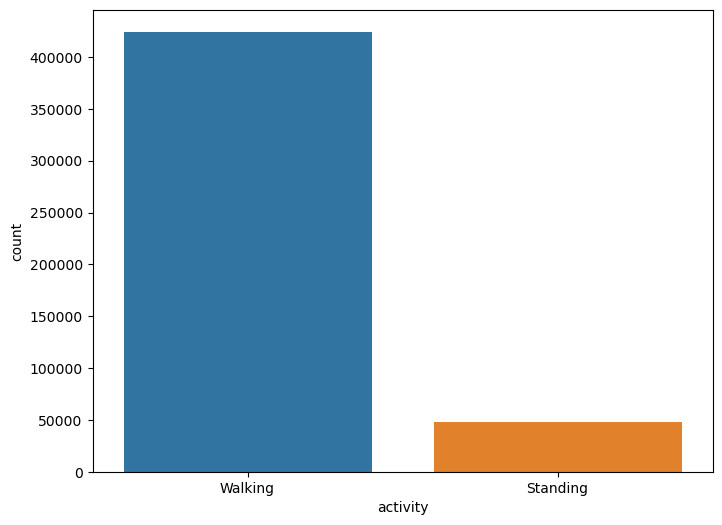

In [62]:

plt.figure(figsize=(8, 6))
sns.countplot(x = "activity", data = df, order = df.activity.value_counts().index)
     

In [63]:
df.activity.value_counts()


activity
Walking     424397
Standing     48395
Name: count, dtype: int64

In [64]:

from sklearn.utils import resample

# 'Standing' 행과 'Walking' 행의 개수 확인
standing_count = (df['activity'] == 'Standing').sum()
walking_count = (df['activity'] == 'Walking').sum()

# 'Walking' 행을 언더샘플링하여 개수를 'Standing' 행과 맞추기
walking_data = df[df['activity'] == 'Walking']
walking_data_resampled = resample(walking_data, replace=False, n_samples=standing_count, random_state=42)

# 'Standing' 행과 언더샘플링된 'Walking' 행을 합치기
df = pd.concat([df[df['activity'] == 'Standing'], walking_data_resampled])

# 결과 확인
print(df['activity'].value_counts())

activity
Standing    48395
Walking     48395
Name: count, dtype: int64


<Axes: xlabel='activity', ylabel='count'>

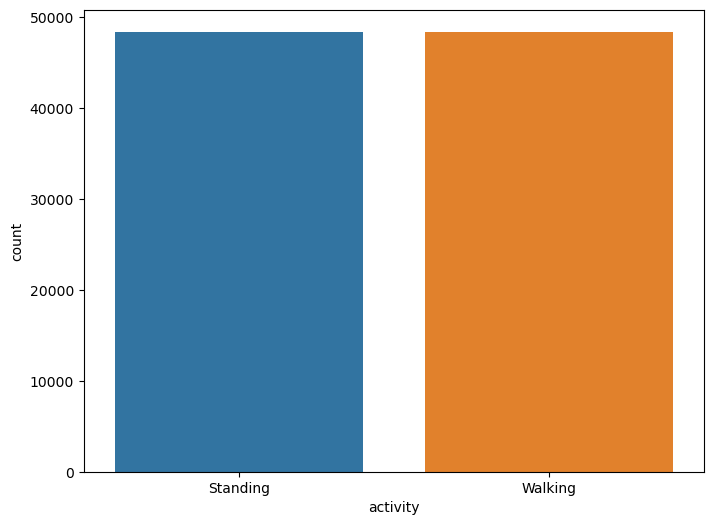

In [101]:
plt.figure(figsize=(8, 6))
sns.countplot(x = "activity", data = df, order = df.activity.value_counts().index)


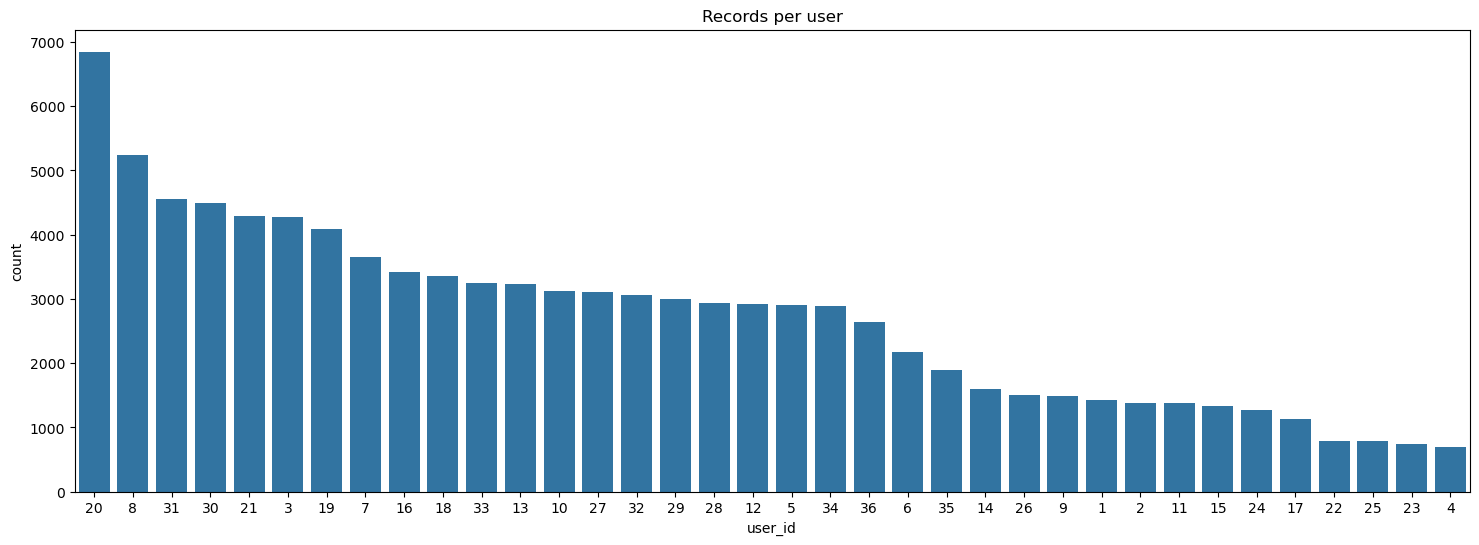

In [65]:
plt.figure(figsize=(18, 6))
sns.countplot(x = "user_id", data = df, palette = [sns.color_palette()[0]],
              order = df.user_id.value_counts().index)
plt.title("Records per user");

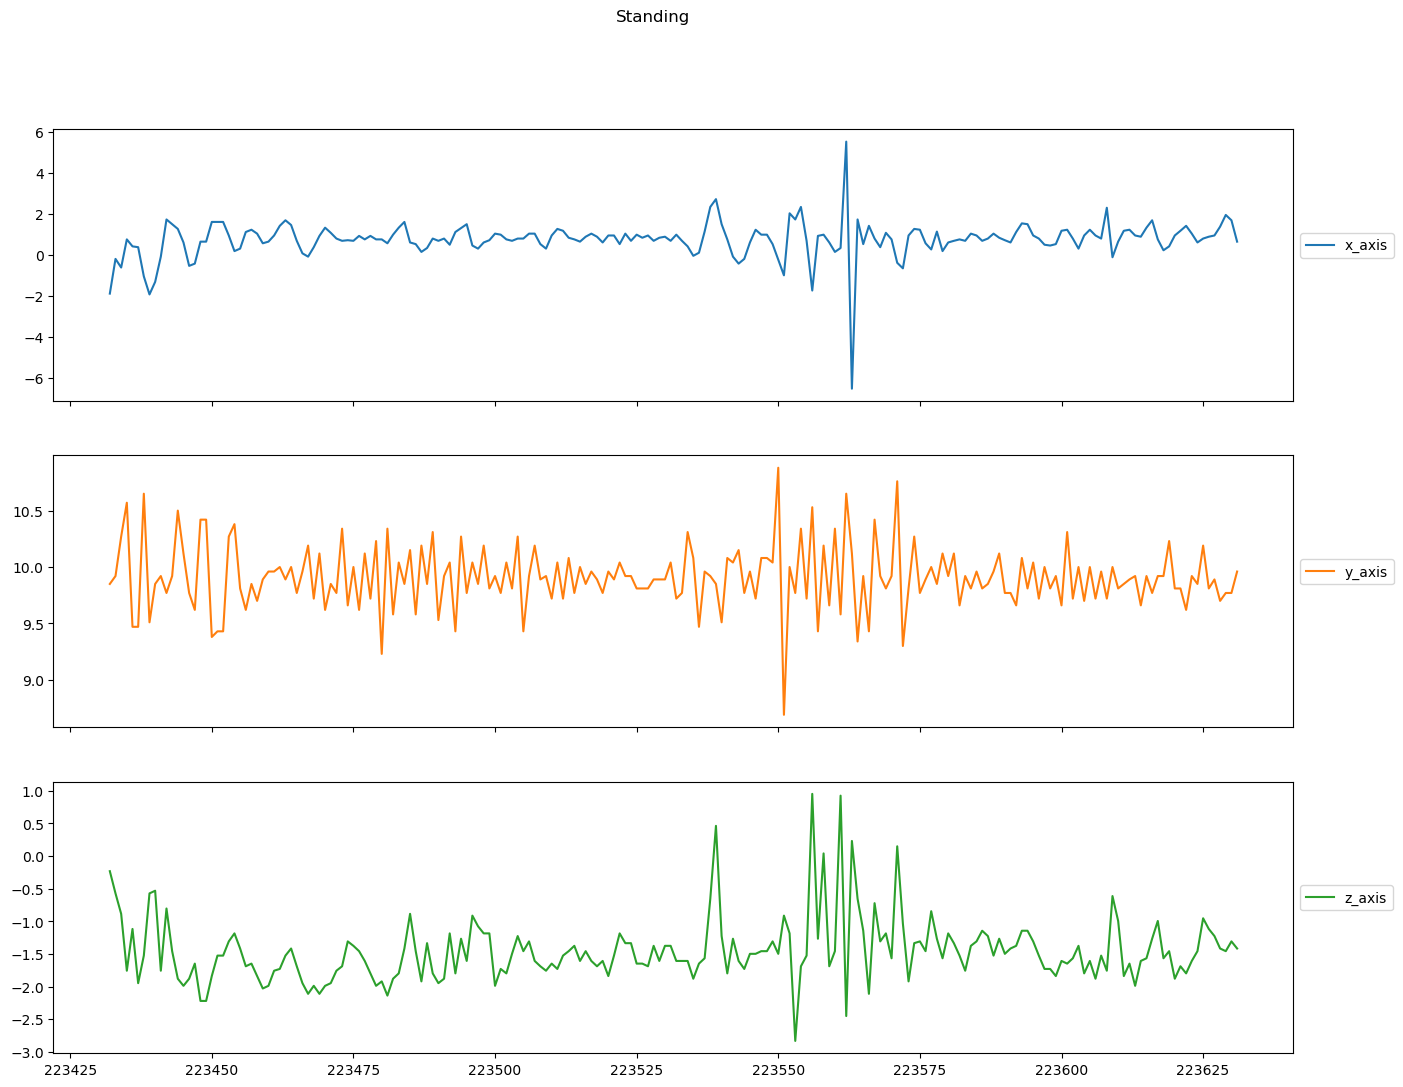

In [66]:

def plot_activity(activity, df):
    data = df[df["activity"] == activity][["x_axis", "y_axis", "z_axis"]][:200]
    axis = data.plot(subplots = True, figsize = (16, 12), title = activity)
    for ax in axis:
        ax.legend(loc = "lower left", bbox_to_anchor = (1.0, 0.5))

plot_activity("Standing", df)

In [67]:

from scipy import stats

def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(v)
        ys.append(stats.mode(labels)[0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)

TIME_STEPS = 200
STEP = 40

X_data, y_data = create_dataset(df[["x_axis", "y_axis", "z_axis"]], df.ActivityEncoded, TIME_STEPS,
                                  STEP)

X_train, X_test,y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, stratify=  y_data )
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size = 0.2, stratify=  y_train )
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
     

(1545, 200, 3) (1545, 1)
(483, 200, 3) (483, 1)


In [68]:


from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown = "ignore", sparse_output = False)
enc = enc.fit(y_train)

y_train_hot = enc.transform(y_train)
y_test_hot = enc.transform(y_test)
y_val_hot = enc.transform(y_val)

print(X_train.shape, y_train_hot.shape, X_test.shape, y_test_hot.shape)
     

(1545, 200, 3) (1545, 2) (483, 200, 3) (483, 2)


In [69]:

#Epoch 10

BATCH_SIZE = 32

verbose,epochs,batch_size=1,10, BATCH_SIZE

n_timesteps,n_features,n_outputs= X_train.shape[1],X_train.shape[2],y_train_hot.shape[1]
n_timesteps,n_features,n_outputs

(200, 3, 2)

In [70]:

# Model 1
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
     

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_7 (Conv1D)           (None, 198, 64)           640       
                                                                 
 dropout_7 (Dropout)         (None, 198, 64)           0         
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 99, 64)           0         
 1D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 6336)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               811136    
                                                                 
 dense_9 (Dense)             (None, 2)                 258       
                                                      

In [71]:

# validation_split = 0.1
batch_size = 128

train_epochs = 10
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)


Epoch 1/10


2024-03-22 02:22:13.633441: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 1s 40ms/step - loss: 2.7811 - accuracy: 0.7741 - val_loss: 0.1506 - val_accuracy: 0.9767
Epoch 2/10
 1/13 [=>............................] - ETA: 0s - loss: 0.0628 - accuracy: 0.9922

2024-03-22 02:22:14.172747: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 0s 19ms/step - loss: 0.1459 - accuracy: 0.9761 - val_loss: 0.0682 - val_accuracy: 0.9742
Epoch 3/10
13/13 [==============================] - 0s 19ms/step - loss: 0.0310 - accuracy: 0.9832 - val_loss: 0.0198 - val_accuracy: 0.9819
Epoch 4/10
13/13 [==============================] - 0s 18ms/step - loss: 0.0173 - accuracy: 0.9909 - val_loss: 0.0189 - val_accuracy: 0.9974
Epoch 5/10
13/13 [==============================] - 0s 18ms/step - loss: 0.0120 - accuracy: 0.9974 - val_loss: 0.0218 - val_accuracy: 0.9974
Epoch 6/10
13/13 [==============================] - 0s 18ms/step - loss: 0.0113 - accuracy: 0.9994 - val_loss: 0.0233 - val_accuracy: 0.9974
Epoch 7/10
13/13 [==============================] - 0s 18ms/step - loss: 0.0110 - accuracy: 0.9981 - val_loss: 0.0236 - val_accuracy: 0.9974
Epoch 8/10
13/13 [==============================] - 0s 18ms/step - loss: 0.0112 - accuracy: 0.9994 - val_loss: 0.0232 - val_accuracy: 0.9974
Epoch 9/10
13/13 [======

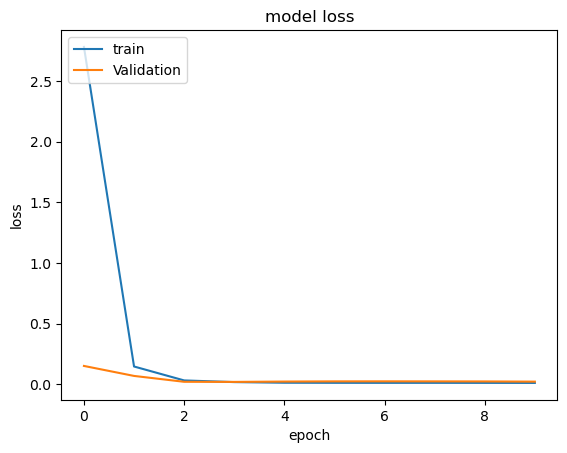

In [72]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

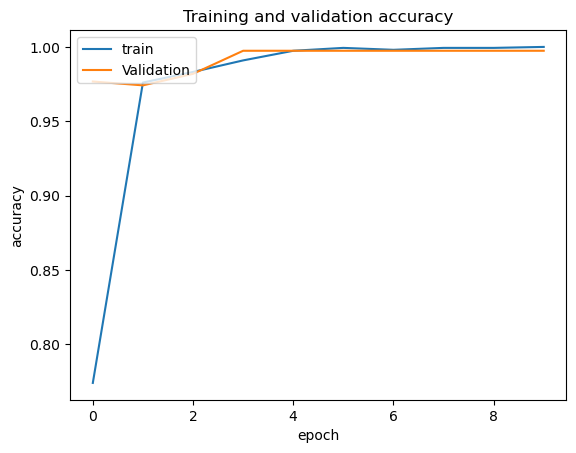

In [73]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

16/16 [==============================] - 0s 3ms/step
f1_score =  1.0
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       241
           1       1.00      1.00      1.00       242

    accuracy                           1.00       483
   macro avg       1.00      1.00      1.00       483
weighted avg       1.00      1.00      1.00       483



2024-03-22 02:22:16.658827: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


<Axes: >

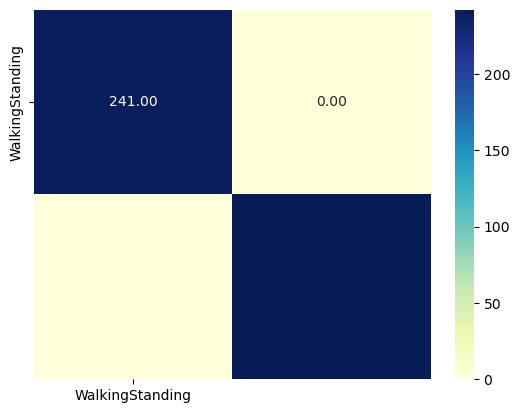

In [74]:
from sklearn.metrics import f1_score

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking''Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_true, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [75]:

# Model 2
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 198, 64)           640       
                                                                 
 dropout_8 (Dropout)         (None, 198, 64)           0         
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 99, 64)           0         
 1D)                                                             
                                                                 
 conv1d_9 (Conv1D)           (None, 97, 64)            12352     
                                                                 
 dropout_9 (Dropout)         (None, 97, 64)            0         
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 48, 64)           0         
 1D)                                                  

In [76]:
# validation_split = 0.1
batch_size = 128

train_epochs = 10
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)
     

Epoch 1/10


2024-03-22 02:22:17.147074: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 1s 46ms/step - loss: 4.4215 - accuracy: 0.6084 - val_loss: 0.4457 - val_accuracy: 0.9716
Epoch 2/10
 1/13 [=>............................] - ETA: 0s - loss: 0.2843 - accuracy: 0.9219

2024-03-22 02:22:17.781161: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 0s 19ms/step - loss: 0.2593 - accuracy: 0.9120 - val_loss: 0.1642 - val_accuracy: 0.9767
Epoch 3/10
13/13 [==============================] - 0s 18ms/step - loss: 0.0944 - accuracy: 0.9696 - val_loss: 0.1388 - val_accuracy: 0.9845
Epoch 4/10
13/13 [==============================] - 0s 19ms/step - loss: 0.0378 - accuracy: 0.9845 - val_loss: 0.0859 - val_accuracy: 0.9897
Epoch 5/10
13/13 [==============================] - 0s 18ms/step - loss: 0.0212 - accuracy: 0.9916 - val_loss: 0.0555 - val_accuracy: 1.0000
Epoch 6/10
13/13 [==============================] - 0s 20ms/step - loss: 0.0129 - accuracy: 0.9948 - val_loss: 0.0429 - val_accuracy: 1.0000
Epoch 7/10
13/13 [==============================] - 0s 19ms/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 0.0330 - val_accuracy: 1.0000
Epoch 8/10
13/13 [==============================] - 0s 19ms/step - loss: 0.0068 - accuracy: 0.9987 - val_loss: 0.0257 - val_accuracy: 1.0000
Epoch 9/10
13/13 [======

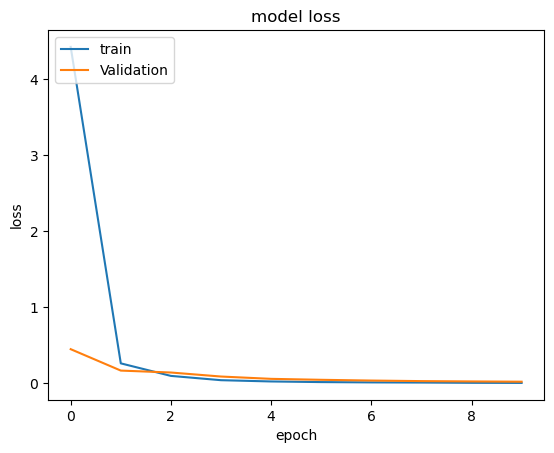

In [77]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

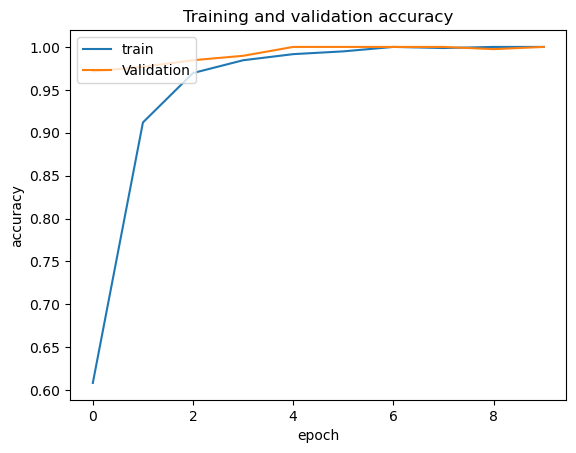

In [78]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
     

16/16 [==============================] - 0s 4ms/step
f1_score =  1.0
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       241
           1       1.00      1.00      1.00       242

    accuracy                           1.00       483
   macro avg       1.00      1.00      1.00       483
weighted avg       1.00      1.00      1.00       483



2024-03-22 02:22:20.370253: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


<Axes: >

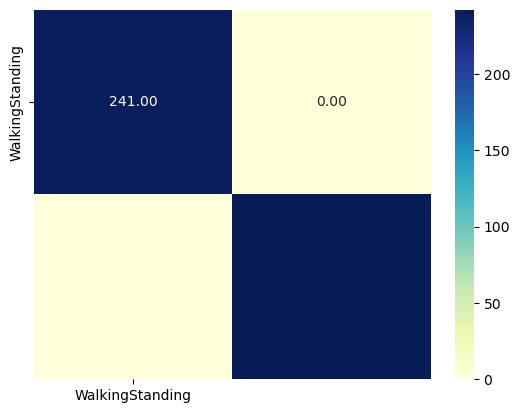

In [79]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking''Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_true, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [80]:
# Model 3
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 198, 64)           640       
                                                                 
 dropout_10 (Dropout)        (None, 198, 64)           0         
                                                                 
 max_pooling1d_10 (MaxPoolin  (None, 99, 64)           0         
 g1D)                                                            
                                                                 
 conv1d_11 (Conv1D)          (None, 97, 64)            12352     
                                                                 
 dropout_11 (Dropout)        (None, 97, 64)            0         
                                                                 
 max_pooling1d_11 (MaxPoolin  (None, 48, 64)           0         
 g1D)                                                 

In [81]:
# validation_split = 0.1
batch_size = 128

train_epochs = 10
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)
     

Epoch 1/10


2024-03-22 02:22:21.371512: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 2s 51ms/step - loss: 4.2567 - accuracy: 0.5722 - val_loss: 0.6811 - val_accuracy: 0.4806
Epoch 2/10
 1/13 [=>............................] - ETA: 0s - loss: 0.5981 - accuracy: 0.7109

2024-03-22 02:22:22.141855: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 0s 20ms/step - loss: 0.3758 - accuracy: 0.8440 - val_loss: 0.4139 - val_accuracy: 0.9457
Epoch 3/10
13/13 [==============================] - 0s 20ms/step - loss: 0.1493 - accuracy: 0.9618 - val_loss: 0.3354 - val_accuracy: 0.9767
Epoch 4/10
13/13 [==============================] - 0s 19ms/step - loss: 0.0797 - accuracy: 0.9773 - val_loss: 0.1677 - val_accuracy: 0.9793
Epoch 5/10
13/13 [==============================] - 0s 19ms/step - loss: 0.0421 - accuracy: 0.9838 - val_loss: 0.1263 - val_accuracy: 1.0000
Epoch 6/10
13/13 [==============================] - 0s 20ms/step - loss: 0.0206 - accuracy: 0.9896 - val_loss: 0.0638 - val_accuracy: 0.9974
Epoch 7/10
13/13 [==============================] - 0s 20ms/step - loss: 0.0078 - accuracy: 0.9994 - val_loss: 0.0395 - val_accuracy: 0.9974
Epoch 8/10
13/13 [==============================] - 0s 19ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0273 - val_accuracy: 0.9974
Epoch 9/10
13/13 [======

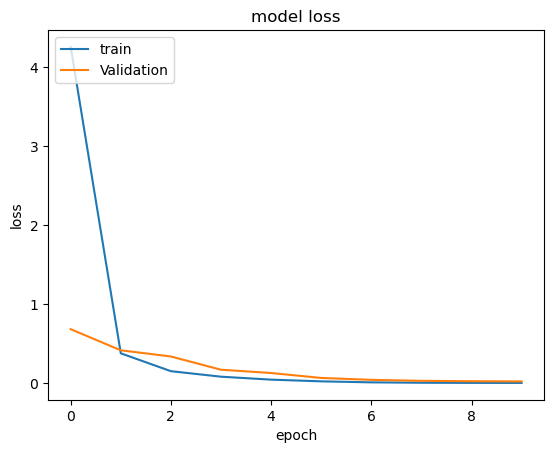

In [82]:


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

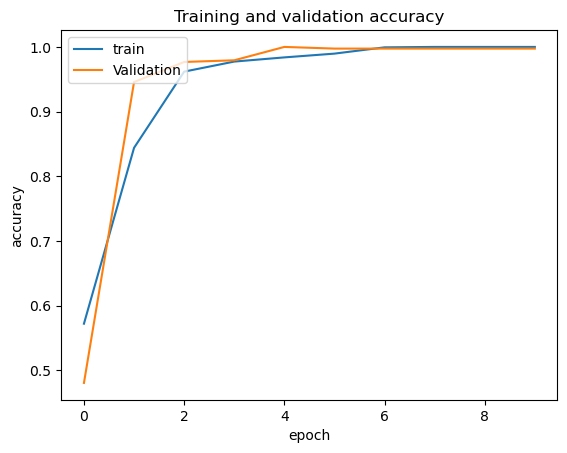

In [99]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
     

16/16 [==============================] - 0s 6ms/step
f1_score =  1.0
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       241
           1       1.00      1.00      1.00       242

    accuracy                           1.00       483
   macro avg       1.00      1.00      1.00       483
weighted avg       1.00      1.00      1.00       483



2024-03-22 02:22:31.838361: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


<Axes: >

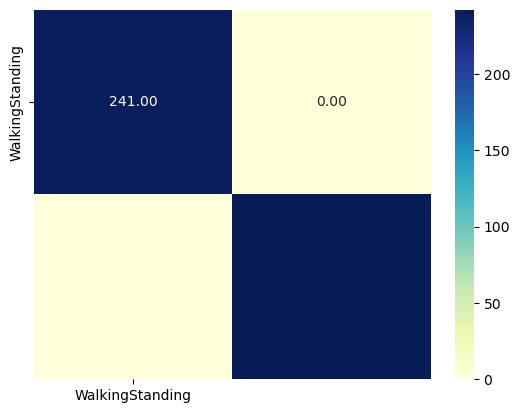

In [100]:

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking''Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_true, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')